In [1]:
import sys
sys.path.append('../')

import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt
import numpy as np

from src.models.net import *
from src.si import *
from src.util import util as ut

/home/gmiglior/.conda/envs/stochint/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
classifier = LatentClassifier(z_dim=10).to(device)
classifier_state_dict = torch.load('../finetuning_scripts/best_classifier_beta_0.01_lr_0.0001.pt')
classifier.load_state_dict(classifier_state_dict)

<All keys matched successfully>

In [3]:
combined_dataloader = ut.get_doubleloader_mnist_and_svhn_data(augment_mnist=True)

Using downloaded and verified file: ../data/extra_32x32.mat


In [9]:
model = UNet(
    dim = 28,
    dim_mults = (1,2,4),
    flash_attn = True,
    channels=1,
    resnet_block_groups=4,
    attn_dim_head=32,
    attn_heads=4,
).to(device)

# model = SmallNet(dim=28).to(device)

si = LinearInterpolant(model, device=device)
si = make_noisy(si, noise_coeff=0.5)
# si = make_sinsq_noisy(si)

In [10]:
num_params = [p.numel() for p in model.parameters()]
print('Number of parameters: ', sum(num_params))

Number of parameters:  2027873


The training procedure produces trajectories like this:

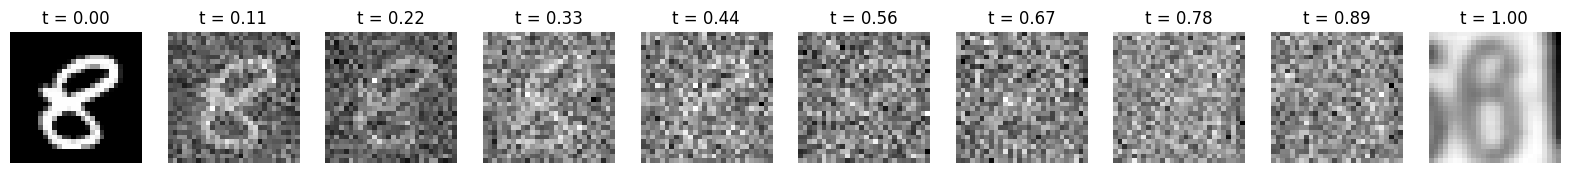

In [11]:
x0_example = next(iter(combined_dataloader))[0][0]
x1_example = next(iter(combined_dataloader))[1][0]

n_steps = 10
t_example = torch.linspace(0, 1, n_steps)

fig, ax = plt.subplots(1,n_steps, figsize=(20, 4))
ax = ax.flatten()

# for i, t in enumerate(t_example):
#     ax[i] = plt.imshow(si.I(t, x0_example, x1_example, ).squeeze().detach().cpu().numpy(), cmap='gray')
#     break

for i, t in enumerate(t_example):
    ax[i].imshow(si.simulate(t, x0_example, x1_example, )[0].squeeze().detach().cpu().numpy(), cmap='gray')
    ax[i].set_title(f't = {t:.2f}')
    ax[i].axis('off')

In [12]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 30
encoder = classifier.encoder
si.ot_train(combined_dataloader, encoder, optimizer, epochs,loss_type='velocity', 
            eval_int=1, save_int=1, save_path='../notebooks/pretrained/demo_two_sided')

100%|██████████| 600/600 [00:37<00:00, 15.83it/s]


tr @ epoch 1/30 | Loss 3.857101 | 37.90 (s)


100%|██████████| 600/600 [00:38<00:00, 15.48it/s]


tr @ epoch 2/30 | Loss 3.320622 | 38.76 (s)


100%|██████████| 600/600 [00:36<00:00, 16.34it/s]


tr @ epoch 3/30 | Loss 3.395642 | 36.73 (s)


100%|██████████| 600/600 [00:36<00:00, 16.41it/s]


tr @ epoch 4/30 | Loss 70.414186 | 36.57 (s)


100%|██████████| 600/600 [00:36<00:00, 16.43it/s]


tr @ epoch 5/30 | Loss 10.206854 | 36.53 (s)


100%|██████████| 600/600 [00:36<00:00, 16.42it/s]


tr @ epoch 6/30 | Loss 3.065538 | 36.56 (s)


100%|██████████| 600/600 [00:36<00:00, 16.43it/s]


tr @ epoch 7/30 | Loss 4.082309 | 36.52 (s)


100%|██████████| 600/600 [00:36<00:00, 16.43it/s]


tr @ epoch 8/30 | Loss 5.087216 | 36.52 (s)


100%|██████████| 600/600 [00:36<00:00, 16.47it/s]


tr @ epoch 9/30 | Loss 1.990485 | 36.44 (s)


100%|██████████| 600/600 [00:39<00:00, 15.12it/s]


tr @ epoch 10/30 | Loss 3.012277 | 39.68 (s)


100%|██████████| 600/600 [00:42<00:00, 14.14it/s]


tr @ epoch 11/30 | Loss 3.348685 | 42.42 (s)


100%|██████████| 600/600 [00:40<00:00, 14.64it/s]


tr @ epoch 12/30 | Loss 3.074762 | 40.98 (s)


100%|██████████| 600/600 [00:42<00:00, 13.97it/s]


tr @ epoch 13/30 | Loss 1.936625 | 42.96 (s)


100%|██████████| 600/600 [00:42<00:00, 14.08it/s]


tr @ epoch 14/30 | Loss 2.558664 | 42.62 (s)


100%|██████████| 600/600 [00:42<00:00, 14.23it/s]


tr @ epoch 15/30 | Loss 3.463947 | 42.15 (s)


100%|██████████| 600/600 [00:39<00:00, 15.18it/s]


tr @ epoch 16/30 | Loss 8.500185 | 39.52 (s)


100%|██████████| 600/600 [00:39<00:00, 15.22it/s]


tr @ epoch 17/30 | Loss 2.779183 | 39.44 (s)


100%|██████████| 600/600 [00:39<00:00, 15.12it/s]


tr @ epoch 18/30 | Loss 10.997843 | 39.68 (s)


100%|██████████| 600/600 [00:39<00:00, 15.17it/s]


tr @ epoch 19/30 | Loss 10.695835 | 39.57 (s)


100%|██████████| 600/600 [00:39<00:00, 15.21it/s]


tr @ epoch 20/30 | Loss 3.076503 | 39.45 (s)


100%|██████████| 600/600 [00:36<00:00, 16.39it/s]


tr @ epoch 21/30 | Loss 2.363452 | 36.61 (s)


100%|██████████| 600/600 [00:39<00:00, 15.22it/s]


tr @ epoch 22/30 | Loss 2.514065 | 39.42 (s)


100%|██████████| 600/600 [00:39<00:00, 15.17it/s]


tr @ epoch 23/30 | Loss 3.586089 | 39.56 (s)


100%|██████████| 600/600 [00:39<00:00, 15.19it/s]


tr @ epoch 24/30 | Loss 1.585163 | 39.50 (s)


100%|██████████| 600/600 [00:39<00:00, 15.13it/s]


tr @ epoch 25/30 | Loss 1.503530 | 39.67 (s)


100%|██████████| 600/600 [00:39<00:00, 15.18it/s]


tr @ epoch 26/30 | Loss 2.646568 | 39.53 (s)


100%|██████████| 600/600 [00:39<00:00, 15.23it/s]


tr @ epoch 27/30 | Loss 2.936200 | 39.41 (s)


100%|██████████| 600/600 [00:39<00:00, 15.26it/s]


tr @ epoch 28/30 | Loss 3.539776 | 39.32 (s)


100%|██████████| 600/600 [00:39<00:00, 15.25it/s]


tr @ epoch 29/30 | Loss 2.571448 | 39.34 (s)


100%|██████████| 600/600 [00:39<00:00, 15.26it/s]


tr @ epoch 30/30 | Loss 1.921496 | 39.33 (s)


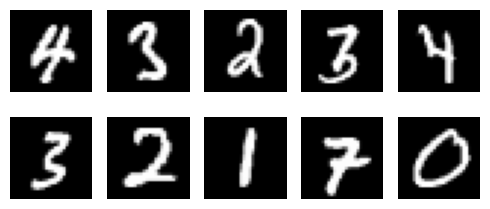

In [19]:
x_initial = next(iter(combined_dataloader))[0][:10].to(device).squeeze()
# show the image
fig, ax = plt.subplots(2, 5, figsize=(5,2.5))
ax = ax.flatten()
for i, img in enumerate(x_initial):
    ax[i].imshow(img.cpu(), cmap='gray')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# class eta_to_b_model(torch.nn.Module):
#     def __init__(self, si):
#         super().__init__()
#         self.eta = si.model
#         self.a = si.a
#         self.b = si.b
#         self.da = si.da
#         self.db = si.db
#     def forward(self, t,x):
#         if t.dim() == 0:
#             t = t.unsqueeze(-1)
        
#         eta_out = self.eta(t,x)
#         return self.da(t)*eta_out + self.db(t)/self.b(t)*(x - self.a(t)* eta_out)

# b_model = eta_to_b_model(si)

In [ ]:
# imgs = b_model(t=torch.tensor([0.001]) , x=x_initial)
# # show the image
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# for i, img in enumerate(imgs):
#     ax[i].imshow(img.squeeze().detach().numpy(), cmap='gray')
#     ax[i].axis('off')

In [ ]:
class rvrs_model(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, t, x):
        if t.dim() == 0:
            t = t.unsqueeze(-1)
        return - self.model(t, x)

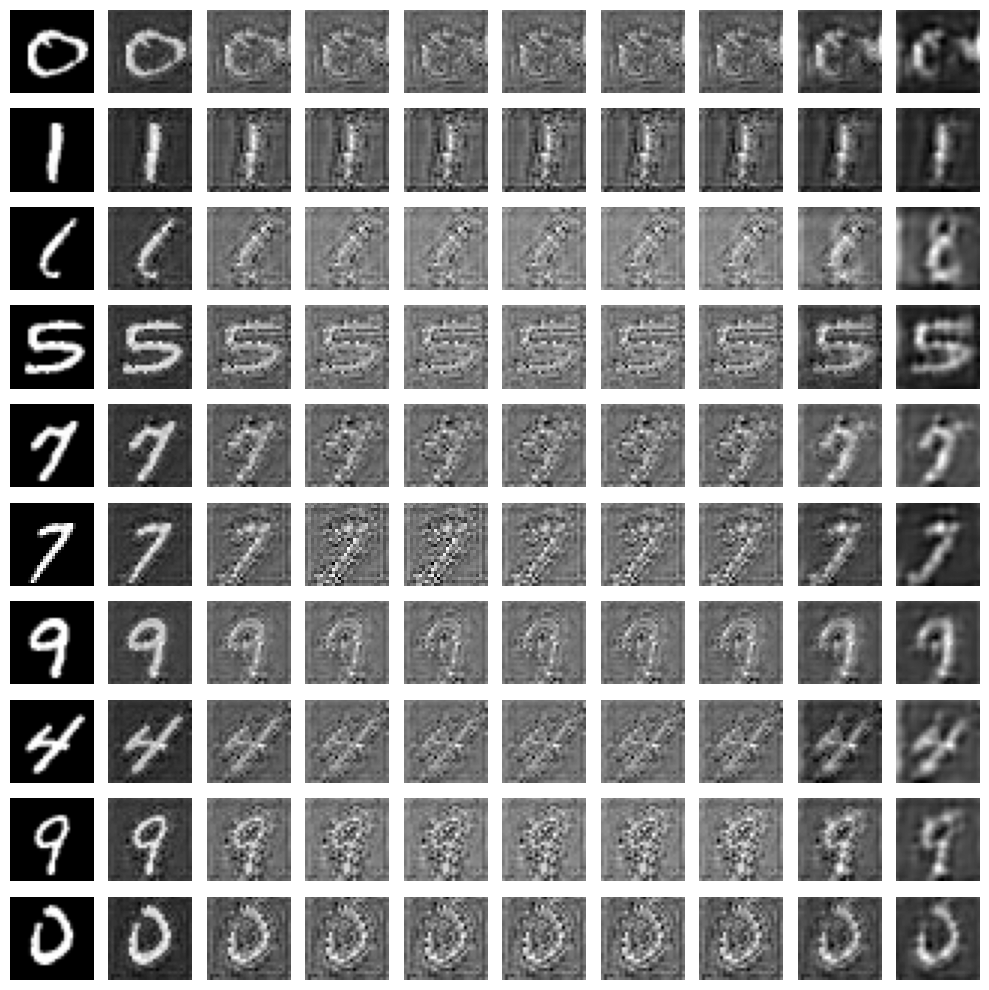

In [12]:
device = 'cpu'

test_loader_mnist = ut.get_mnist_test()
x_initial = next(iter(test_loader_mnist))[0][:10].to(device)

n_eval = 10
n_samples = 10
# x_initial = torch.randn(n_samples, 1, 28, 28)

t = torch.linspace(0,1, n_eval, device=device)
inital_batch_size = x_initial.shape[0]

if n_samples > inital_batch_size:
    # if x_initial has less samples than n_samples, repeat x_initial at random to get n_samples
    n_new_samples = n_samples - inital_batch_size
    x_initial = torch.cat([x_initial, x_initial[torch.randint(0, inital_batch_size, (n_new_samples,))]], dim=0)
if n_samples < inital_batch_size:
    # if x_initial has more samples than n_samples, randomly choose n_samples samples from x_initial
    x_initial = x_initial[torch.randperm(inital_batch_size)[:n_samples]]


method = 'dopri5'
rtol = 1e-5
atol = 1e-5
out = odeint(model.to(device), x_initial, t, method=method, rtol=rtol, atol=atol)

# show the image
fig, axs = plt.subplots(n_samples, n_eval, figsize=(n_eval, n_samples))

for i in range(n_samples):
    for j in range(n_eval):
        axs[i, j].imshow(out[j][i].squeeze().detach().numpy(), cmap='gray')
        axs[i, j].axis('off')
    
plt.tight_layout()
plt.show()


Using downloaded and verified file: ../data/test_32x32.mat


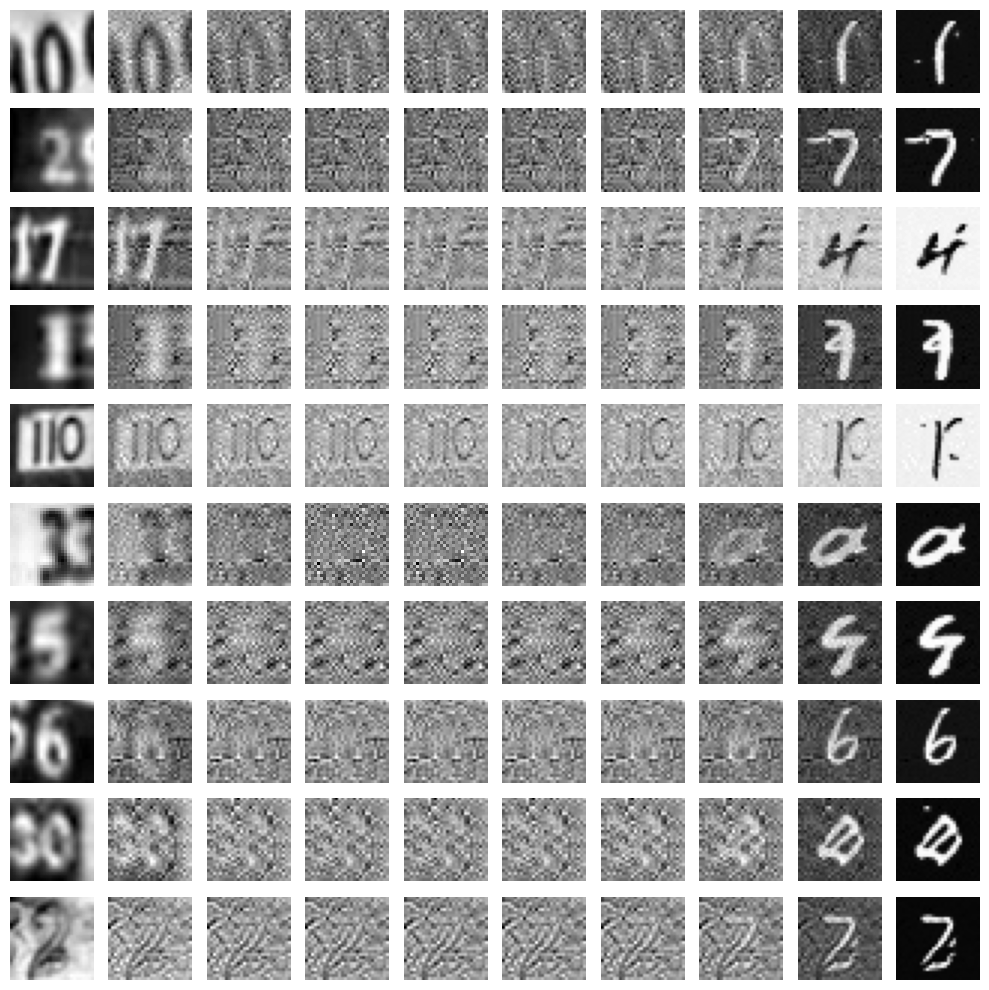

In [8]:
device = 'cpu'

test_loader_svhn = ut.get_svhn_test()
x_initial = next(iter(test_loader_svhn))[0][:10].to(device)
# x_initial = torch.randn(10, 1, 28, 28).to(device)

n_eval = 10
n_samples = 10
# x_initial = torch.randn(n_samples, 1, 28, 28)

t = torch.linspace(1., 0., n_eval, device=device)
inital_batch_size = x_initial.shape[0]

if n_samples > inital_batch_size:
    # if x_initial has less samples than n_samples, repeat x_initial at random to get n_samples
    n_new_samples = n_samples - inital_batch_size
    x_initial = torch.cat([x_initial, x_initial[torch.randint(0, inital_batch_size, (n_new_samples,))]], dim=0)
if n_samples < inital_batch_size:
    # if x_initial has more samples than n_samples, randomly choose n_samples samples from x_initial
    x_initial = x_initial[torch.randperm(inital_batch_size)[:n_samples]]


method = 'dopri5'
rtol = 1e-3
atol = 1e-3
out = odeint(model.to(device), x_initial, t, method=method, rtol=rtol, atol=atol)

# show the image
fig, axs = plt.subplots(n_samples, n_eval, figsize=(n_eval, n_samples))

for i in range(n_samples):
    for j in range(n_eval):
        axs[i, j].imshow(out[j][i].squeeze().detach().numpy(), cmap='gray')
        axs[i, j].axis('off')
    
plt.tight_layout()
plt.show()

In [30]:
test_loader_mnist = ut.get_mnist_test()
test_loader_svhn = ut.get_svhn_test()

n_examples = 10
x0_example = next(iter(test_loader_mnist))[0][:n_examples]
x1_example = next(iter(test_loader_svhn))[0][:n_examples]

x1_opti, wd = optimal_WD_matching(x0_example.to('cuda:1'), x1_example.to('cuda:1'), encoder, return_values=True)

Using downloaded and verified file: ../data/test_32x32.mat


In [31]:
def optimal_WD_matching(x0, x1, encoder, return_values=True):
    h0 = encoder(x0)
    h1 = encoder(x1)
    z_mu0, z_sigma0 = ut.gaussian_parameters(h0)
    z_mu1, z_sigma1 = ut.gaussian_parameters(h1)
    wds = ut.batch_gaussian_wd(z_mu0, z_sigma0, z_mu1, z_sigma1)
    indices = ut.linear_sum_assignment(wds.cpu().detach().numpy())[1]
    x1_opti = x1[indices]
    if return_values:
        values = []
        for i in range(n_examples):
            values.append(wds[i, indices[i]].item())
        return x1_opti, values
    else:
        return x1_opti

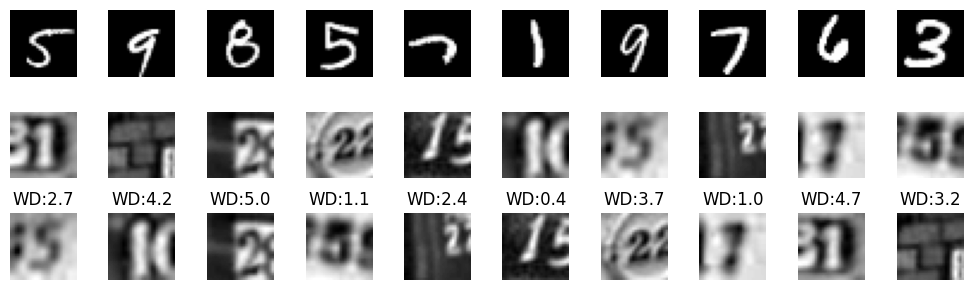

In [32]:
fig, axs = plt.subplots(3, n_examples, figsize=(n_examples, 3))
for i in range(n_examples):
    axs[0, i].imshow(x0_example[i].squeeze().detach().numpy(), cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(x1_example[i].squeeze().detach().numpy(), cmap='gray')
    axs[1, i].axis('off')
    axs[2, i].imshow(x1_opti[i].squeeze().detach().cpu().numpy(), cmap='gray')
    axs[2, i].set_title(f'WD:{np.round(wd[i],1)}')
    axs[2, i].axis('off')


# axs[2,n_examples//2].set_title('OT')
plt.tight_layout()
plt.show()

In [33]:
# Nearest neighbor for generated images on training set to ensure no memorization
from sklearn.neighbors import NearestNeighbors

def get_nearest_neighbors(x, x_train, n_neighbors=5):
    print(x.shape, x_train.shape)
    x = x.reshape(x.shape[0], -1)
    x_train = x_train.reshape(x_train.shape[0], -1)
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(x_train)
    distances, indices = nbrs.kneighbors(x)
    return indices

gen_samples = out[-1].detach().cpu()
mnist_train = torch.cat(combined_dataloader.dataset.dataset1)

x0_closest = get_nearest_neighbors(gen_samples, mnist_train.numpy(), n_neighbors=1)

torch.Size([10, 1, 28, 28]) (60000, 28, 28)


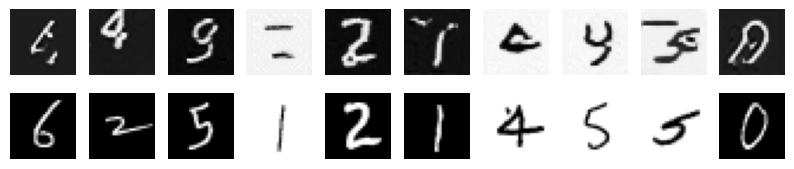

In [34]:
fig, axs = plt.subplots(2, 10, figsize=(n_examples, 2))
for i in range(n_examples):
    axs[0, i].imshow(gen_samples[i].squeeze().detach().numpy(), cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(mnist_train[x0_closest[i][0]].squeeze().detach().numpy(), cmap='gray')
    axs[1, i].axis('off')